In [45]:
from tensorflow.keras.models import Model as KerasModel
from tensorflow.keras.layers import Input, Dense, Activation, Reshape,Concatenate, Dropout, concatenate
from tensorflow.keras.layers import Embedding
# from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import numpy as np

from tensorflow.keras import backend as K
from tensorflow.keras import regularizers as regularizers

**User defined regularizer**

In [134]:
## User defined regularizer 1, function
def l1_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix)) 

## User defined regularizer 2, clousre
def l1_reg_alpha(alpha):
    def find_l1(weight_matrix):
        return alpha*K.sum(K.abs(weight_matrix))
    return find_l1


## Try decorator 3:
def l1_reg_deco(alpha):
    def find_l1(func):
        def wrapper(*args):
            return alpha*func(*args)
        return wrapper
    return find_l1

@l1_reg_deco(0.01)
def l12_reg(weight_matrix):
    return K.sum(K.abs(weight_matrix))


## class 4:
class l1_reg_class:
    
    def __init__(self, alpha):
        self.alpha = alpha
        
    def __call__(self, weight_matrix):
        return self.alpha*K.sum(K.abs(weight_matrix))

In [138]:
input_layer = Input(shape = (5,))
hidden = Dense(10, activation = 'relu', activity_regularizer = l1_reg_class(0.02))(input_layer)
output = Dense(1, activation = 'sigmoid')(hidden)
model = KerasModel(inputs = input_layer, outputs = output)

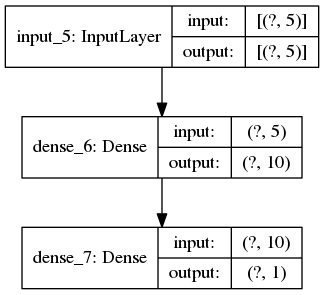

In [141]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='test.png')
from IPython.display import Image
Image(retina=True, filename='test.png')

In [143]:
x_train = np.random.normal(0, 1, size=(100, 5))
y_train = np.random.randint(2, size=100)

In [145]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=1)

Train on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 5ms/sample - loss: 0.8410 - accuracy: 0.4900
Epoch 2/10
100/100 [==============================] - 0s 31us/sample - loss: 0.8392 - accuracy: 0.4900
Epoch 3/10
100/100 [==============================] - 0s 29us/sample - loss: 0.8375 - accuracy: 0.4900
Epoch 4/10
100/100 [==============================] - 0s 30us/sample - loss: 0.8357 - accuracy: 0.4900
Epoch 5/10
100/100 [==============================] - 0s 32us/sample - loss: 0.8340 - accuracy: 0.4900
Epoch 6/10
100/100 [==============================] - 0s 39us/sample - loss: 0.8323 - accuracy: 0.4900
Epoch 7/10
100/100 [==============================] - 0s 41us/sample - loss: 0.8307 - accuracy: 0.4900
Epoch 8/10
100/100 [==============================] - 0s 37us/sample - loss: 0.8290 - accuracy: 0.4900
Epoch 9/10
100/100 [==============================] - 0s 27us/sample - loss: 0.8273 - accuracy: 0.4900
Epoch 10/10
100/100 [==============================] 

In [129]:
def time_alpha(alpha):
    def functional(func):
        def wrapper(*args):
            return alpha*func(*args)
        return wrapper
    return functional

@time_alpha(0.01)
def f_x(x):
    return sum(x)**2

a = [1,2,3,4]
print(f_x(a))

1.0
